In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import seaborn as sns

In [2]:
def alpha_m(v):
    if abs(v+54)>1.0e-8:
        alpha_m = 0.32*(v+54)/(1-np.exp(-(v+54)/4))
    else:
        alpha_m=1
    return alpha_m

def beta_m(v):
    beta_m = 0.28*(v+27)/(np.exp((v+27)/5)-1)
    return beta_m

In [3]:
def alpha_n(v):
    if abs(v+52)>1.0e-8:
        alpha_n = 0.032*(v+52)/(1-np.exp(-(v+52)/5))
    else:
        alpha_n=0.32
    return alpha_n

def beta_n(v):
    beta_n = 0.5*np.exp(-(v+57)/40)
    return beta_n

In [4]:
def m_inf(v):
    return alpha_m(v) / (alpha_m(v)+beta_m(v))

def n_inf(v):
    return alpha_n(v)/(alpha_n(v)+beta_n(v))

def tau_n(v):
    return 1/(alpha_n(v)+beta_n(v))

In [5]:
def HodgkinHuxley_2D(t, y, C=1, v_Na = 50, v_K=-100, v_L = -67, g_Na=100, g_K=80, g_L=0.1, I_app=1.5):
    v = y[0]
    n = y[1]

    dvdt = ( g_Na * m_inf(v)**3 * (0.83 - n) * (v_Na - v) + g_K * n**4*(v_K - v) + g_L * (v_L - v) + I_app ) / C
    dndt = (n_inf(v) - n) / tau_n(v)

    return np.array([dvdt, dndt])

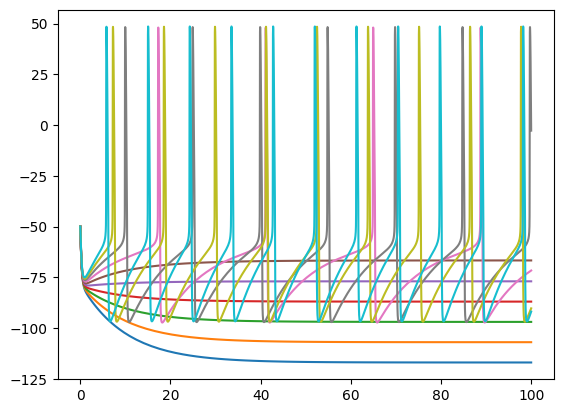

In [6]:
t_span = [0,100]
y0 = np.array([ -50, 0.4 ])

for i in range(-5, 5):
    I_app = i
    soln = solve_ivp(HodgkinHuxley_2D, t_span, y0, args=(1, 50, -100, -67, 100, 80, 0.1, I_app), rtol=1e-8, atol=1e-6)
    plt.plot(soln.t, soln.y[0], label=f'I_app={I_app}')
#soln = solve_ivp(HodgkinHuxley_2D, t_span, y0, rtol=1e-8, atol=1e-6)

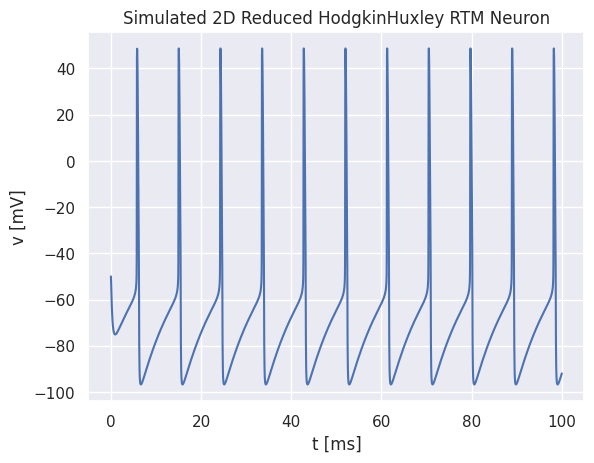

In [7]:
sns.set_theme(style="darkgrid")
plt.plot(soln.t,soln.y[0])
plt.title("Simulated 2D Reduced HodgkinHuxley RTM Neuron")
plt.xlabel("t [ms]")
plt.ylabel("v [mV]")
plt.show()
# plt.savefig("TwoDim_HH_RTM_test.png", dpi=300)

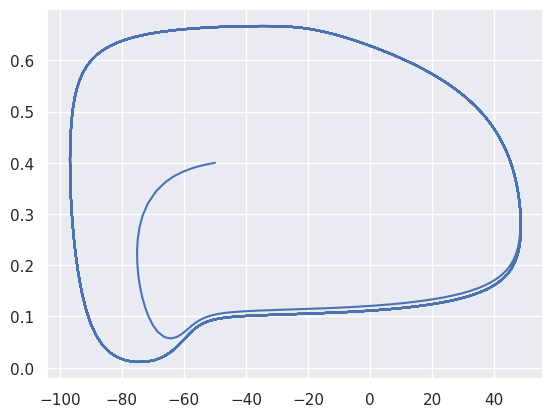

In [8]:
plt.plot(soln.y[0],soln.y[1])
plt.show()